# データ分析演習(2)

まず、基本的なライブラリを読み込む。

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

## 1. 職業の社会的地位はどのような要因で決まるのか？

データファイル "prestige.csv" を読み込み、最初の10行を表示する。

In [13]:
df = pd.read_csv('prestige.csv') # 読み込み
df.head(10) # 表示

,education,income,women,prestige
0,13.11,12351,11.16,68.8
1,12.26,25879,4.02,69.1
2,12.77,9271,15.70,63.4
3,11.42,8865,9.11,56.8
4,14.62,8403,11.68,73.5
5,15.64,11030,5.13,77.6
6,15.09,8258,25.65,72.6
7,15.44,14163,2.69,78.1
8,14.52,11377,1.03,73.1
9,14.64,11023,0.94,68.8


このデータは、各行がそれぞれ職業に対応し、4つの列 (education: 教育期間の平均、income: 収入額の平均、women: 女性比率、prestige: アンケート調査による社会的地位の高さ) を持つ。このデータを使い、第1〜3列を説明変数とし、第4列を目的変数として回帰分析を行えば、職業の社会的地位がどのような要因（教育期間、収入額、女性比率）から決まるかが分かるだろう。

データを説明変数$X$と目的変数$y$に分け、説明変数$X$については列ごとに標準化し、
一定の値をとる列を加える。

In [14]:
X = df.drop('prestige', axis=1) # 第１２列を除去し説明変数とする
X = (X - X.mean()) / X.std() # 標準化
X = sm.add_constant(X) # 一定の値をとる列の追加
y = df['prestige'] # 目的変数

statsmodels ライブラリを使い、回帰分析を行う。

In [15]:
regr = sm.OLS(y, X).fit() # 回帰係数の計算
regr.summary() # 結果の表示

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     129.2
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           6.26e-34
Time:                        07:35:51   Log-Likelihood:                -352.82
No. Observations:                 102   AIC:                             713.6
Df Residuals:                      98   BIC:                             724.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.8333      0.777     60.281      0.000      45.292      48.375
education     11.4230      1.061     10.771      0.000       9.318      13.528
income         5.5773      1.179      4.729      0.000       3.237       7.918
women         -0.2825      0.965     -0.293      0.770      -2.197       1.632
==============================================================================
Omnibus:                        0.271   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.436
Skew:                          -0.085   Prob(JB):                        0.804
Kurtosis:                       2.729   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

（ここに考察を書きます）

## 2. ワインの品質はどのような要因で決まるのか？

データファイル "winequality-red.csv" を読み込み、最初の10行を表示する。

In [16]:
df = pd.read_csv('winequality-red.csv') # 読み込み
df.head(10) # 表示

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


第1〜11列はワインに含まれる成分の化学的な測定値で、第12列はワインの品質を表す。
このデータを使い、第1〜11列を説明変数とし、第12列を目的変数として回帰分析を行えば、ワイン品質がどのような成分から決まるかが分かるだろう。

データを説明変数$X$と目的変数$y$に分け、説明変数$X$については列ごとに標準化し、
一定の値をとる列を加える。

In [18]:
X = df.drop('quality', axis=1) # 第１２列を除去し説明変数とする
X = (X - X.mean()) / X.std() # 標準化
X = sm.add_constant(X) # 一定の値をとる列の追加
y = df['quality'] # 目的変数

statsmodels ライブラリを使い、回帰分析を行う。

In [19]:
regr = sm.OLS(y, X).fit() # 回帰係数の計算
regr.summary() # 結果の表示

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          1.79e-145
Time:                        07:38:46   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6360      0.016    347.788      0.000       5.604       5.668
fixed acidity            0.0435      0.045      0.963      0.336      -0.045       0.132
volatile acidity        -0.1940      0.022     -8.948      0.000      -0.237      -0.151
citric acid             -0.0356      0.029     -1.240      0.215      -0.092       0.021
residual sugar           0.0230      0.021      1.089      0.276      -0.018       0.065
chlorides               -0.0882      0.020     -4.470      0.000      -0.127      -0.050
free sulfur dioxide      0.0456      0.023      2.009      0.045       0.001       0.090
total sulfur dioxide    -0.1074      0.024     -4.480      0.000      -0.154      -0.060
density                 -0.0337      0.041     -0.827      0.409      -0.114       0.046
pH                      -0.0639      0.030     -2.159      0.031      -0.122      -0.006
sulphates                0.1553      0.019      8.014      0.000       0.117       0.193
alcohol                  0.2943      0.028     10.429      0.000       0.239       0.350
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                         7.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

（ここをダブルクリックして考察を書いて下さい）



## 3. 新型コロナ感染者数のデータにおける移動平均

データファイル "pcr_positive.csv" を読み込み、最初の10行を表示する。

In [23]:
df = pd.read_csv('pcr_positive.csv') # 読み込み
df.head(10) # 表示

,Date,Positive
0,2020/1/16,1
1,2020/1/17,0
2,2020/1/18,0
3,2020/1/19,0
4,2020/1/20,0
5,2020/1/21,0
6,2020/1/22,0
7,2020/1/23,0
8,2020/1/24,1
9,2020/1/25,1


時系列データを折れ線グラフとして描画する。

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text major ticklabel objects>)

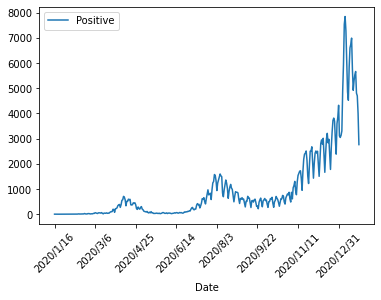

In [24]:
df.plot(x='Date', y='Positive') # データを折れ線グラフとして描画 (横軸が"Date"列、縦軸が"Positive Cases"列)
plt.xticks(rotation=45) # 横軸の目盛の数値を見やすいように傾ける

時系列データに7日間ごとの周期成分が含まれていることが分かる。この成分を移動平均により取り除く。新しく "MA" 列を作り、移動平均を行ったデータを代入する。

In [25]:
df['MA'] = df['Positive'].rolling(window=7).mean() # 7日間の幅で移動平均

移動平均後の時系列データを描画する。移動平均の処理により、ピークの位置や増減の傾向が分かりやすくなった。

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text major ticklabel objects>)

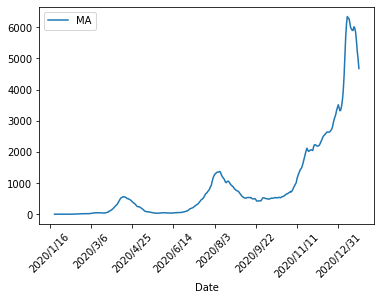

In [26]:
df.plot(x='Date', y='MA') # データを折れ線グラフとして描画 (横軸が"Date"列、縦軸が"MA"列)
plt.xticks(rotation=45) # 横軸の目盛の数値を見やすいように傾ける